## Introduction
In this report, we will try to create two classification machine learning algorithms. The two classifications models that we will be going to use will try to classify the heart disease data. The two classification models will try to model the heart data in a way that the features of the patients can be classified as having the disease, or there is no disease.  The two classification models will be compared after the modeling using the accuracy level.


In [1]:
# importing the neccessray variables
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set(style="whitegrid")
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

## Data
The data contains 303 observations and 13 variables. Here are the variables in the data,
•	age: The person's age in years

•	sex: The person's sex (1 = male, 0 = female)


•	cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

•	trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)


•	chol: The person's cholesterol measurement in mg/dl

•	fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 


•	restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

•	thalach: The person's maximum heart rate achieved

•	exang: Exercise-induced angina (1 = yes; 0 = no) 

•	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

•	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


•	ca: The number of major vessels (0-3)

•	thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


•	target: Heart disease (0 = no, 1 = yes)
The dependent variable in the data is the target. The target condition represents the condition of having or not having heart disease. The remaining variables are the independent variables. The only preprocessing technique that was used when cleaning the data is to change the data type of the variables. The following variables were converted from the numerical to objects;
1.	sex
2.	cp
3.	fbs
4.	restecg
5.	exang
6.	slope
7.	thal


In [2]:
Heart = pd.read_csv("heart.csv")

In [3]:
Heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
Heart.shape

(303, 14)

# Data Exploration 

# 1. Target Variable

In [4]:
print ("Distribution of Target\n",Heart.target.value_counts())


Distribution of Target
 1    165
0    138
Name: target, dtype: int64


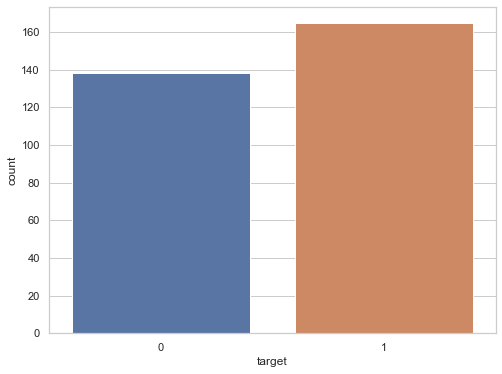

In [5]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=Heart)
plt.show()

# 2. Sex and Target

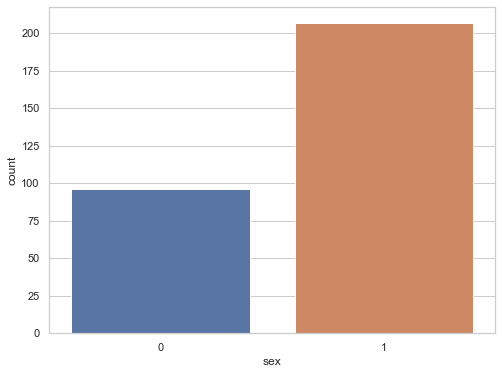

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", data=Heart)
plt.show()

In [18]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### converting the data type

In [19]:
Heart['sex'] = Heart['sex'].astype('object')
Heart['cp'] = Heart['cp'].astype('object')
Heart['fbs'] = Heart['fbs'].astype('object')
Heart['restecg'] = Heart['restecg'].astype('object')
Heart['exang'] = Heart['exang'].astype('object')
Heart['slope'] = Heart['slope'].astype('object')
Heart['thal'] = Heart['thal'].astype('object')

In [20]:
Heart.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


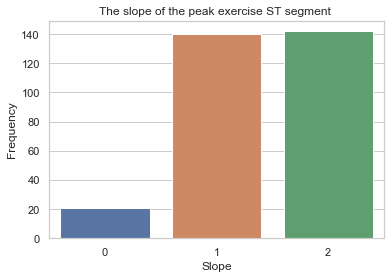

In [26]:
sns.countplot(Heart.slope)
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('The slope of the peak exercise ST segment ')
plt.show()

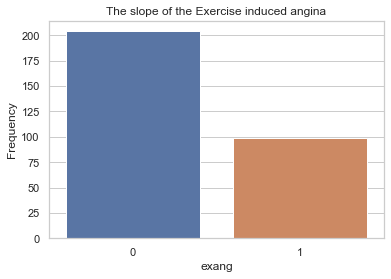

In [27]:
sns.countplot(Heart.exang)
plt.xlabel('exang')
plt.ylabel('Frequency')
plt.title('The slope of the Exercise induced angina')
plt.show()

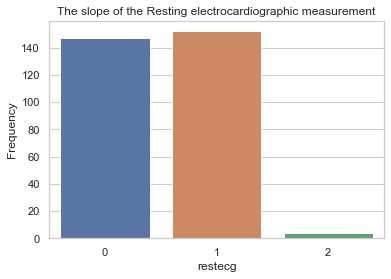

In [28]:
sns.countplot(Heart.restecg)
plt.xlabel('restecg')
plt.ylabel('Frequency')
plt.title('The slope of the Resting electrocardiographic measurement')
plt.show()

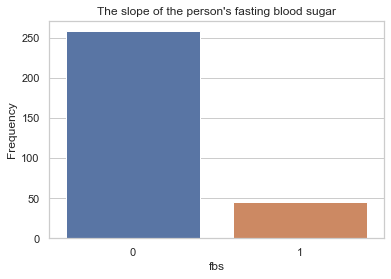

In [29]:
sns.countplot(Heart.fbs)
plt.xlabel('fbs')
plt.ylabel('Frequency')
plt.title("The slope of the person's fasting blood sugar")
plt.show()

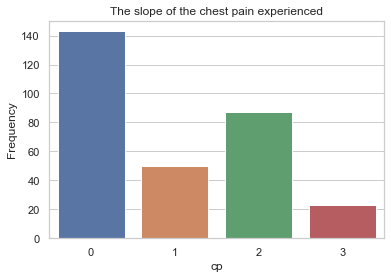

In [30]:
sns.countplot(Heart.cp)
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.title("The slope of the chest pain experienced")
plt.show()

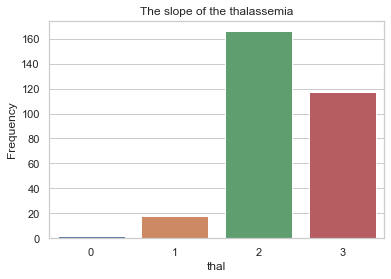

In [31]:
sns.countplot(Heart.thal)
plt.xlabel('thal')
plt.ylabel('Frequency')
plt.title("The slope of the thalassemia")
plt.show()

## Model

The two classification models that were used in the modeling are
1.	 Logistic regression: It is occurs when the target variable is a binary. Logistic regression is also a predictive model that is used to predict the dependent variables given the independent variables. The same concept is used in linear regression and the only difference is that its dependent variable is binary, while the dependent variable of the linear regression. It describes the data and explains the relationship between the dependent variables (binary or dichotomous). However, logistic regression is one of the models that are very difficult to interpret. Logistic regression models also model the probability of the default class. The default class is the dependent variable in the data. 
2.	Naïve Bayes. This is a type of classification type that is derived for the Bayes' theorem, which uses the probability theorem and statistics. The Bayes' theory has been used in the field of machine learning and decorated as one of the machine learning techniques known as the Naïve Bayes.  The classification technique assigns the hypothesis to the given target class on the data. Bayes Theorem comes out strongly in this kind of scenario. Also, in Naive Bayes. The target variable i.e., the dependent variable, should also be a binary or a dichotomous variable. This is why it is one of the classification techniques of machine learning.
Before the modeling was conducted, the dependent and independent variables were selected from the data. The data was later portioned into training and testing data. The training data was given 80 % proportion while the testing data was given 20 % proportion. The data was also spilled using the set seed. This ensures that there is consistency, especially when two models are to be compared. When the variables are so large, we use feature selection to select the best variables that can be used to predict the dependent variable, but, in this scenario, the independent variables are only 12 variables, and thus, there is no need to conduct the feature selection processes. 


# Partion data into X and Y

In [7]:
Y = Heart['target']

X = Heart.drop('target', axis = 1)
print (X.shape)
print (Y.shape)

(303, 13)
(303,)


In [8]:
# encoding 
X = pd.get_dummies(Heart, drop_first=True)
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Partition into training and testing 

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [10]:
# 1. Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Accuracy_score=logreg.score(X_test,Y_test)
print("Logistic Regression Accuracy using 80 % training data:", Accuracy_score.round(4)*100, "%")
# confusion matrix
Y_pred = logreg.predict(X_test)
Confusion_m = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix of Logistic Regression \n",Confusion_m)
print("Precision, Recall, fi-sacore and Support\n",classification_report(Y_test, Y_pred))

Logistic Regression Accuracy using 80 % training data: 100.0 %
Confusion Matrix of Logistic Regression 
 [[27  0]
 [ 0 34]]
Precision, Recall, fi-sacore and Support
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [14]:
# Naive bayes
from sklearn.naive_bayes import MultinomialNB 
model = MultinomialNB().fit(X_train, Y_train)  #Train the model on the training data 
Y_pred = model.predict(X_test) #Test the model on the testing data and comparing the result with the actual target. 
confusion_M = confusion_matrix(Y_test, Y_pred)
print("Model Accuracy :", model.score(X_train, Y_train).round(4)*100)
model_S = model.score(X_train, Y_train).round(4)
print("Confusion Matrix of Naive Bayes \n",confusion_M)
# f1, recall, support, precision 
print("Precision, Recall, fi-sacore and Support\n",classification_report(Y_test, Y_pred))

Model Accuracy : 87.19
Confusion Matrix of Naive Bayes 
 [[19  8]
 [ 1 33]]
Precision, Recall, fi-sacore and Support
               precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.80      0.97      0.88        34

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.84        61
weighted avg       0.87      0.85      0.85        61



## Results
The accuracy level that was obtained from the logistic regression was 100 %, while the accuracy level earned from the Naïve Bayes was 87.19 %. This means that the logistic regression was best suited to predict the heart data compared to the Naïve Bayes model. The results can be compared graphically using the bar chart, as shown in the figure below.


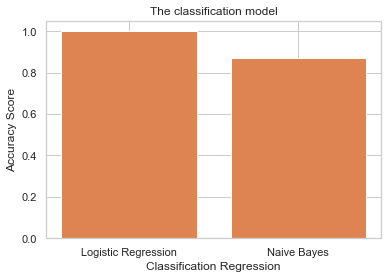

In [17]:
data = [Accuracy_score, model_S]
plt.bar(["Logistic Regression","Naive Bayes"], data)
plt.xlabel('Classification Regression')
plt.ylabel('Accuracy Score')
plt.title('The classification model')
plt.bar(range(len(data)), data) 
plt.show()

The above bar chart shows that the accuracy level of the logistic regression was higher than the accuracy level of the Naïve Bayes. 

## Conclusion
Classification is one of the supervised machine learning where the data is trained and the accuracy of the models determined. It isn't very easy to know the best model to predict specific data, and therefore, it is always good to compare two or more classification model to determine the most accurate model to be used to predict a specific data. The accuracy level plays a significant role in determining the best model to be used to classify the dependent variables. In our case, we used two classifications model i.e., logistic regression and Naïve Bayes. The accuracy model for the logistic regression was obtained to be 100 %, while the accuracy level for the Naïve Bayes was obtained to be 87.19 %. Therefore, logistic regression is the preferred model that can be used to classify the patience to have heart disease or not. 
